In [1]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve,RocCurveDisplay

#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

#Pandas-Profiling helps to build a widget that can be used to better visualise it
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

### Importing the dataset

In [2]:
df=pd.read_csv('C:/Users/27ama/multiple-disease-prediction-streamlit-app/dataset/indian_liver_patient.csv')

### Shape of the dataset (Rows, Columns)

In [3]:
df.shape

(583, 11)

### Head of the dataset

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<br><br>
# Exploratory Data analysis
<br>

### Renaming columns

In [5]:
df.rename(columns ={'Dataset':'Result'}, inplace = True)

In [6]:
# View of the Renamed Dataframe
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Information about the data

In [7]:
data=df

In [8]:
list(df.columns.values)

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Result']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Result                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Description about the dataset

In [10]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### Are there any missing values?

In [11]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Result                        0
dtype: int64

In [12]:
df=df.dropna()

### Correlation matrix & Matrix Visualisation

In [13]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


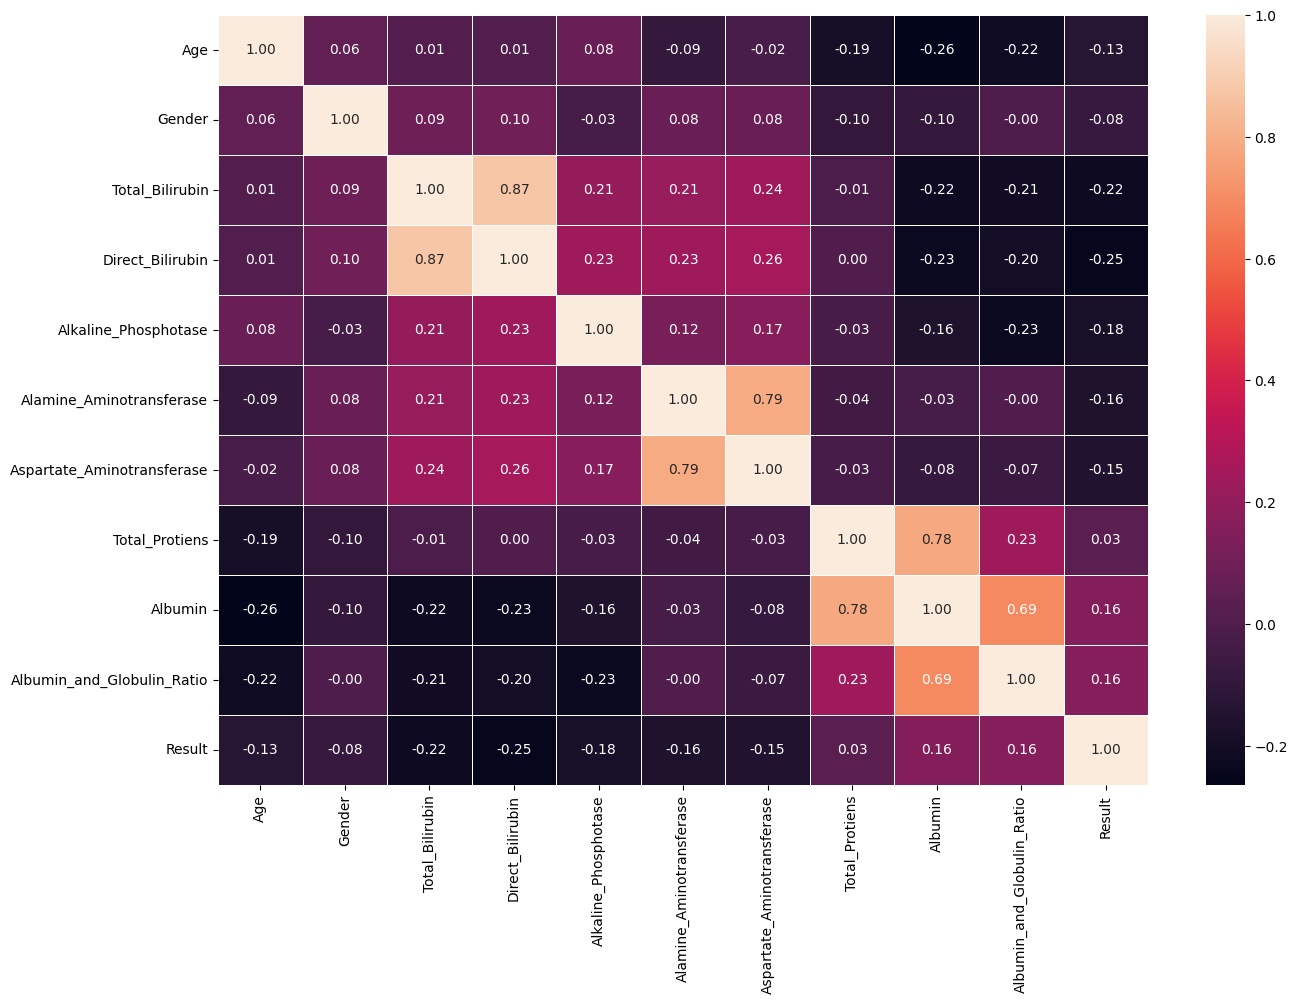

In [14]:
# Let's make our correlation matrix visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [15]:
df.head()

#We will be taking independent variables to predict dependent variables

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Split data using Train-Test Split

In [16]:
X=df.drop('Result',axis=1)
y=df['Result']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<br>
Now we have got our data split into training and test sets, it is time to build a Machine Learning model.

We will train it (find the patterns) on the training set.

And we will test it (use the patterns) on the test set.

**We're going to try 3 different Machine Learning models:**
1. Logistic Regression

2. K-Nearest Neighbours Classifier

3. Random Forest Classifier

## 1. Logistic Regression

In [17]:
lr=LogisticRegression()

In [18]:
lr.fit(X_train,y_train)

LogisticRegression()

In [19]:
#Training score

lr.score(X_train,y_train)

0.7473002159827213

In [20]:
#Prediction of the test variable

lr_y_preds=lr.predict(X_test)

In [21]:
#Testing accuracy

lr.score(X_test,y_test)

0.6293103448275862

### Confusion Matrix

In [22]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


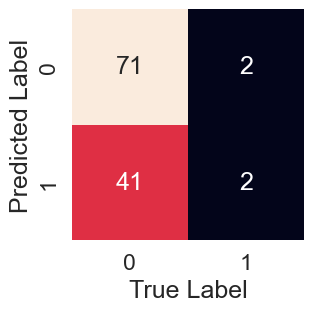

In [23]:
plot_conf_mat(y_test,lr_y_preds)

### Classification Report

In [24]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           1       0.63      0.97      0.77        73
           2       0.50      0.05      0.09        43

    accuracy                           0.63       116
   macro avg       0.57      0.51      0.43       116
weighted avg       0.58      0.63      0.51       116



## 2. K-Nearest Neighbour

In [25]:
knn=KNeighborsClassifier()

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
#Training score

knn.score(X_train,y_train)

0.7883369330453563

In [28]:
#Prediction of the test variable

knn_y_preds=knn.predict(X_test)

In [29]:
#Testing accuracy

knn.score(X_test,y_test)

0.6206896551724138

### Confusion Matrix

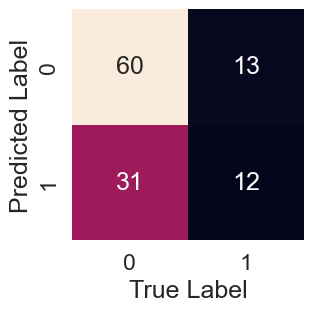

In [30]:
plot_conf_mat(y_test,knn_y_preds)

### Classification Report

In [31]:
print(classification_report(y_test,knn_y_preds))

              precision    recall  f1-score   support

           1       0.66      0.82      0.73        73
           2       0.48      0.28      0.35        43

    accuracy                           0.62       116
   macro avg       0.57      0.55      0.54       116
weighted avg       0.59      0.62      0.59       116



## 3. Random Forest

In [32]:
rf=RandomForestClassifier()

In [33]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
#Training score

rf.score(X_train,y_train)

1.0

In [35]:
#Prediction of the test variable

rf_y_preds=rf.predict(X_test)

In [36]:
#Testing accuracy

rf.score(X_test,y_test)

0.6379310344827587

### Confusion Matrix

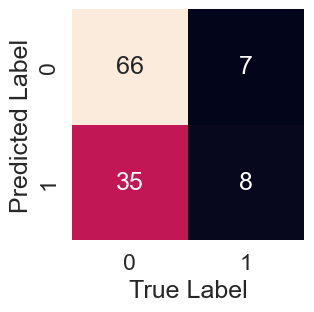

In [37]:
plot_conf_mat(y_test,rf_y_preds)

### Classification Report

In [38]:
print(classification_report(y_test,rf_y_preds))

              precision    recall  f1-score   support

           1       0.65      0.90      0.76        73
           2       0.53      0.19      0.28        43

    accuracy                           0.64       116
   macro avg       0.59      0.55      0.52       116
weighted avg       0.61      0.64      0.58       116



In [39]:
svm = SVC()

In [40]:
svm.fit(X_train,y_train)

SVC()

In [41]:
svm.score(X_train,y_train)

0.7365010799136069

In [42]:
preds=svm.predict(X_test)
svm.score(X_test,y_test)

0.6293103448275862

<br><br>
### Different Model Scores (accuracy)

In [43]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN':knn.score(X_test,y_test),
             'Random Forest':rf.score(X_test,y_test),
             'svm':svm.score(X_test,y_test)}

In [44]:
model_scores

{'Logistic Regression': 0.6293103448275862,
 'KNN': 0.6206896551724138,
 'Random Forest': 0.6379310344827587,
 'svm': 0.6293103448275862}

## Model Comparison

In [45]:
#Based on accuracy
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest,svm
accuracy,0.62931,0.62069,0.637931,0.62931


In [46]:
from joblib import Parallel, delayed
import joblib
joblib.dump(rf, 'liver.sav')

['liver.sav']

<Axes: >

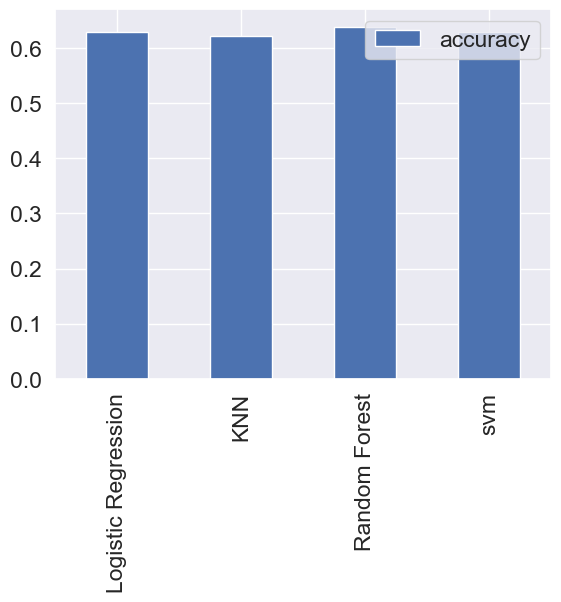

In [47]:
model_compare.T.plot(kind='bar') # (T is here for transpose)